# Predictive Analytics : Kualitas pada Buah Pisang
- Nauval Dwi Primadya

## Deksripsi Proyek

### Deskripsi dan Latar Belakang dari Proyek Prediksi Kualitas pada Buah Pisang dengan menggunakan Machine Learning

Proyek ini berfokus pada pengembangan model machine learning untuk memprediksi kualitas buah pisang secara lebih akurat dan efisien. Saat ini, penilaian kualitas pisang masih dilakukan secara manual, yang membutuhkan banyak waktu, tenaga, dan memiliki potensi kesalahan tinggi. Kondisi ini menyebabkan kerugian bagi petani dan distributor, serta seringkali mengecewakan konsumen. Model prediksi kualitas pisang ini diharapkan dapat menjadi solusi yang lebih akurat, efisien, dan transparan dalam mengatasi permasalahan tersebut.

# 1.  Melakukan Import Library yang digunakan

In [1]:
# Mengimpor pustaka untuk memuat data dan visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor fungsi untuk membagi data, skala, dan evaluasi model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score  # metrik akurasi

# Mengimpor model-model klasifikasi
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier  # RF, GB, Extra Trees
from sklearn.svm import SVC  # SVM
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes
from sklearn.linear_model import LogisticRegression  # Logistic Regression


# 2. Data Understanding

merupakan tahapan untuk memahami informasi dari sebuah dataset dan digunakan untuk menentukan kualitas dari dataset tersebut. serta mendapatkan wawasan langkah apa saja yang akan diterapkan pada dataset tersebut.

## 2.1 Data Loading
Tahap *Data Loading* bertujuan untuk memuat dataset yang akan digunakan, sehingga mempermudah pemahaman terhadap data tersebut. Dataset ini telah melalui proses *pembersihan* dan *normalisasi* oleh penyusunnya, sehingga siap digunakan dan lebih mudah diakses, bahkan oleh pemula.

<br>

**Detail Dataset**

- **Title**: Kualitas Banana
- **Source**: [Kaggle](https://www.kaggle.com/datasets/l3llff/banana)
- **Visibility**: Public


## 2.2 Exploratory Data Analysis **(EDA)**

*Exploratory Data Analysis* adalah proses awal dalam menyelidiki data untuk memahami karakteristiknya, mengidentifikasi pola dan anomali, serta memverifikasi asumsi yang mungkin ada pada data tersebut. Metode ini umumnya memanfaatkan teknik statistik serta visualisasi grafis untuk menyajikan informasi dengan lebih jelas.

### Deskripsi Variabel

In [2]:
df = pd.read_csv("dataset/banana_quality.csv")

In [3]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Informasi dari dataframe diatas adalah sebagai berikut, yang terdiri dari 8 kolom. 

- **Size**: ukuran buah
- **Weight**: berat buah
- **Sweetness**: tingkat kemanisan buah
- **Softness**: kelembutan buah
- **HarvestTime**: waktu yang telah berlalu sejak buah dipanen
- **Ripeness**: tingkat kematangan buah
- **Acidity**: tingkat keasaman buah
- **Quality**: kualitas buah


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


Dari hasil eksekusi diperoleh informasi sebagai berikut:

- Ada 7 kolom dengan tipe data numerik float64, yaitu: Size, Weight, Sweetness, Softness, HarvestTime, Ripeness, dan Acidity.
- Terdapat 1 kolom bertipe data object, yaitu: Quality.

In [5]:
df = df.rename(columns={'Quality': 'label'})

merubah Quality menjadi Label agar memudahkan dalam memproses

label
Good    4006
Bad     3994
Name: count, dtype: int64


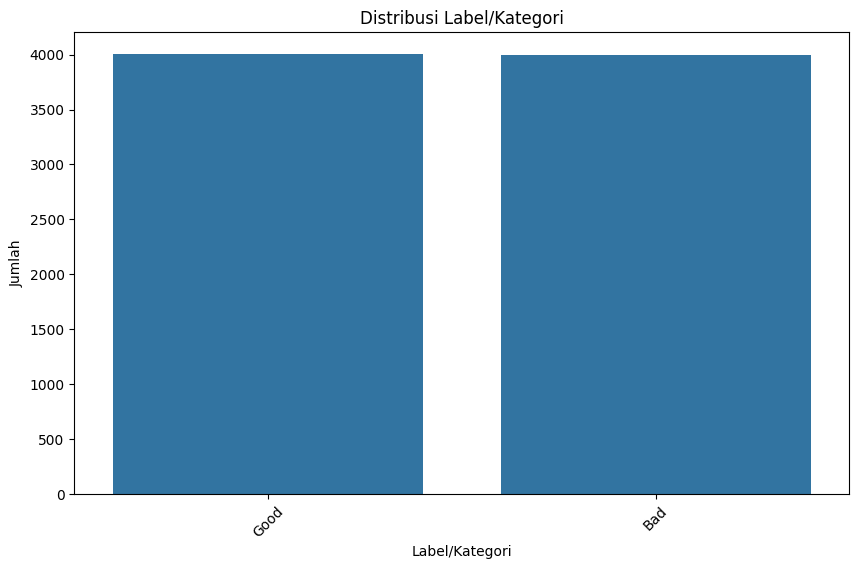

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya, kolom label bernama 'label'
label_counts = df['label'].value_counts()
# Menampilkan hasil
print(label_counts)

# Membuat plot batang
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribusi Label/Kategori')
plt.xlabel('Label/Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Menampilkan sebaran dataset dari masing-masing label. yaitu label `Good` dan `Bad`

In [7]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


memberikan infromasi statistik dari masing-masing kolom, antara lain sebagai berikut : 
- `Count`: jumlah sampel dalam data
- `Mean`: rata-rata nilai
- `Std`: standar deviasi, yang menunjukkan sebaran data dari rata-rata
- `Min`: nilai minimum dalam setiap kolom
- `25%`: kuartil pertama, yaitu batas yang membagi data menjadi 25% bagian pertama
- `50%`: kuartil kedua atau median, yaitu nilai tengah data
- `75%`: kuartil ketiga, membagi data hingga 75% bagian
- `Max`: nilai maksimum dalam kolom


In [8]:
df.shape

(8000, 8)

Memiliki Jumlah Baris `8000` dan kolom `8`

In [9]:
df['label'].value_counts()

label
Good    4006
Bad     3994
Name: count, dtype: int64

Menghitung jumlah data dari masing-masing label.
<br>
didapatkan, pada label `Good : 4006` dan pada label `Bad : 3994`.
<br>
data dapat dikatakan `imbalance` namun masih masuk kategori normal. dikarenakan perbedaan jumlah data tidak terlalu signifikan.

### Menangani Missing Value dan Outlier

In [10]:
df.duplicated().sum()

0

menghitung jumlah data yang duplikat.

In [11]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
label          0
dtype: int64

In [12]:
data_miss = df[df.isnull().any(axis=1)]
data_miss

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,label


Tidak terdapat daya yang `Missing Value` sehingga tidak perlu menghapus atau memperbaiki data.

### Menampilkan atau memvisualisasikan Outlier

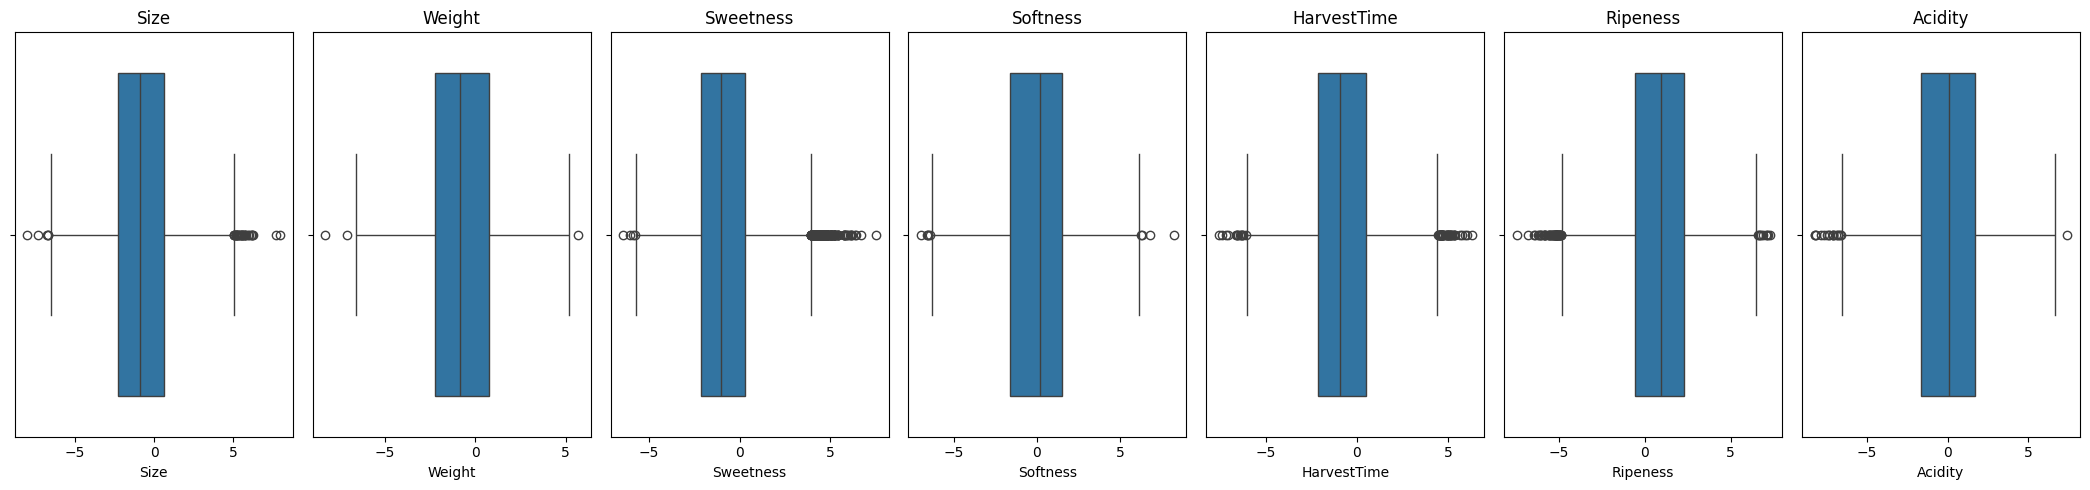

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom numerik (kecuali object)
df_outlier = df.select_dtypes(exclude=['object'])

# Tentukan ukuran grid untuk subplot
num_columns = len(df_outlier.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(num_columns*3, 5))

# Jika hanya ada satu kolom, axes bukan list
if num_columns == 1:
    axes = [axes]

# Membuat boxplot untuk setiap kolom dalam 1 frame
for i, column in enumerate(df_outlier.columns):
    sns.boxplot(data=df_outlier, x=column, ax=axes[i])
    axes[i].set_title(column)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


*Menghilangkan outlier dalam dataset*

Pada kasus ini, kita akan menggunakan teknik visualisasi data (boxplot) untuk mendeteksi outlier. Setelah itu, outlier akan ditangani menggunakan metode IQR.

```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```

In [14]:
import pandas as pd

# Pastikan operasi hanya dilakukan pada kolom numerik
df_numeric = df.select_dtypes(include=[float, int])

# Menghitung Q1, Q3, dan IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier berdasarkan IQR
df_numeric_clean = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menggabungkan kembali dengan kolom non-numerik (jika ada)
df = df.loc[df_numeric_clean.index]

# Menampilkan dataframe yang sudah bersih
print(df.head())


       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  label  
0  Good  
1  Good  
2  Good  
3  Good  
4  Good  


In [15]:
df.shape

(7645, 8)

Jumlah dataset setelah melakukan proses hapus outlier menjadi 

### Univariate Analysis

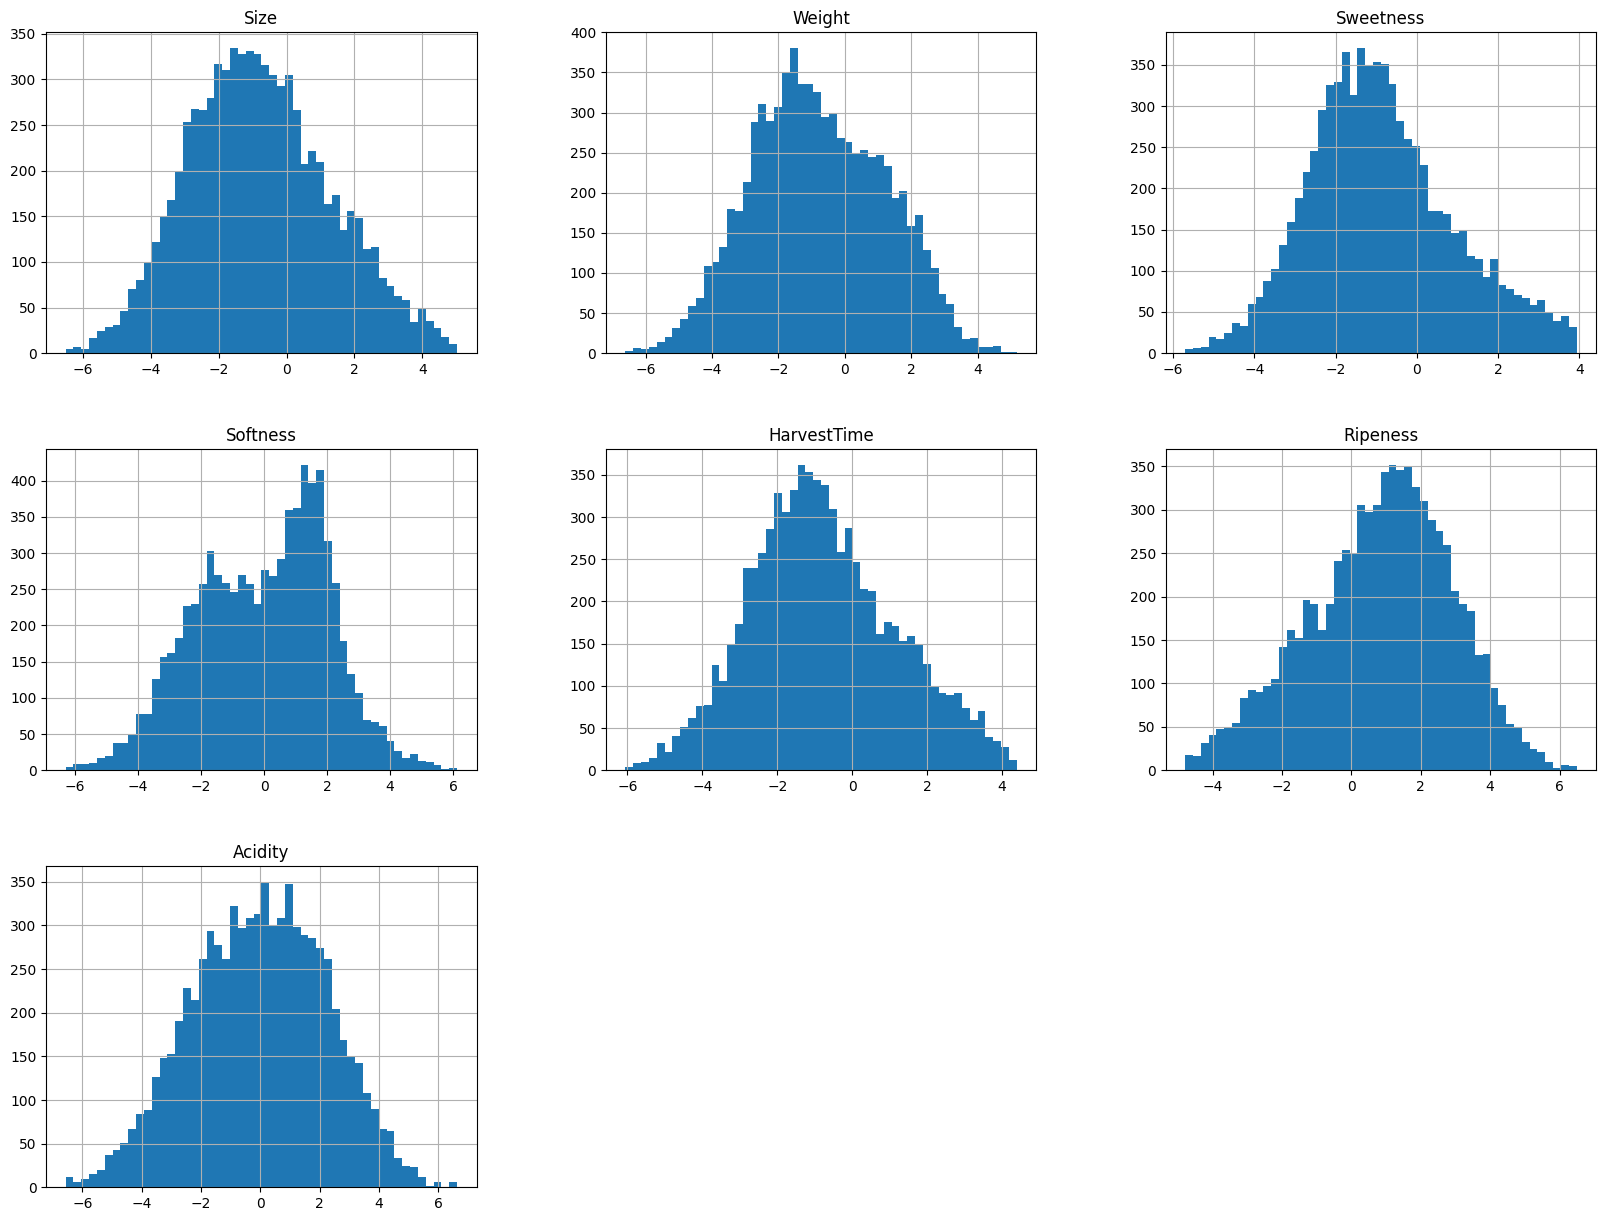

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

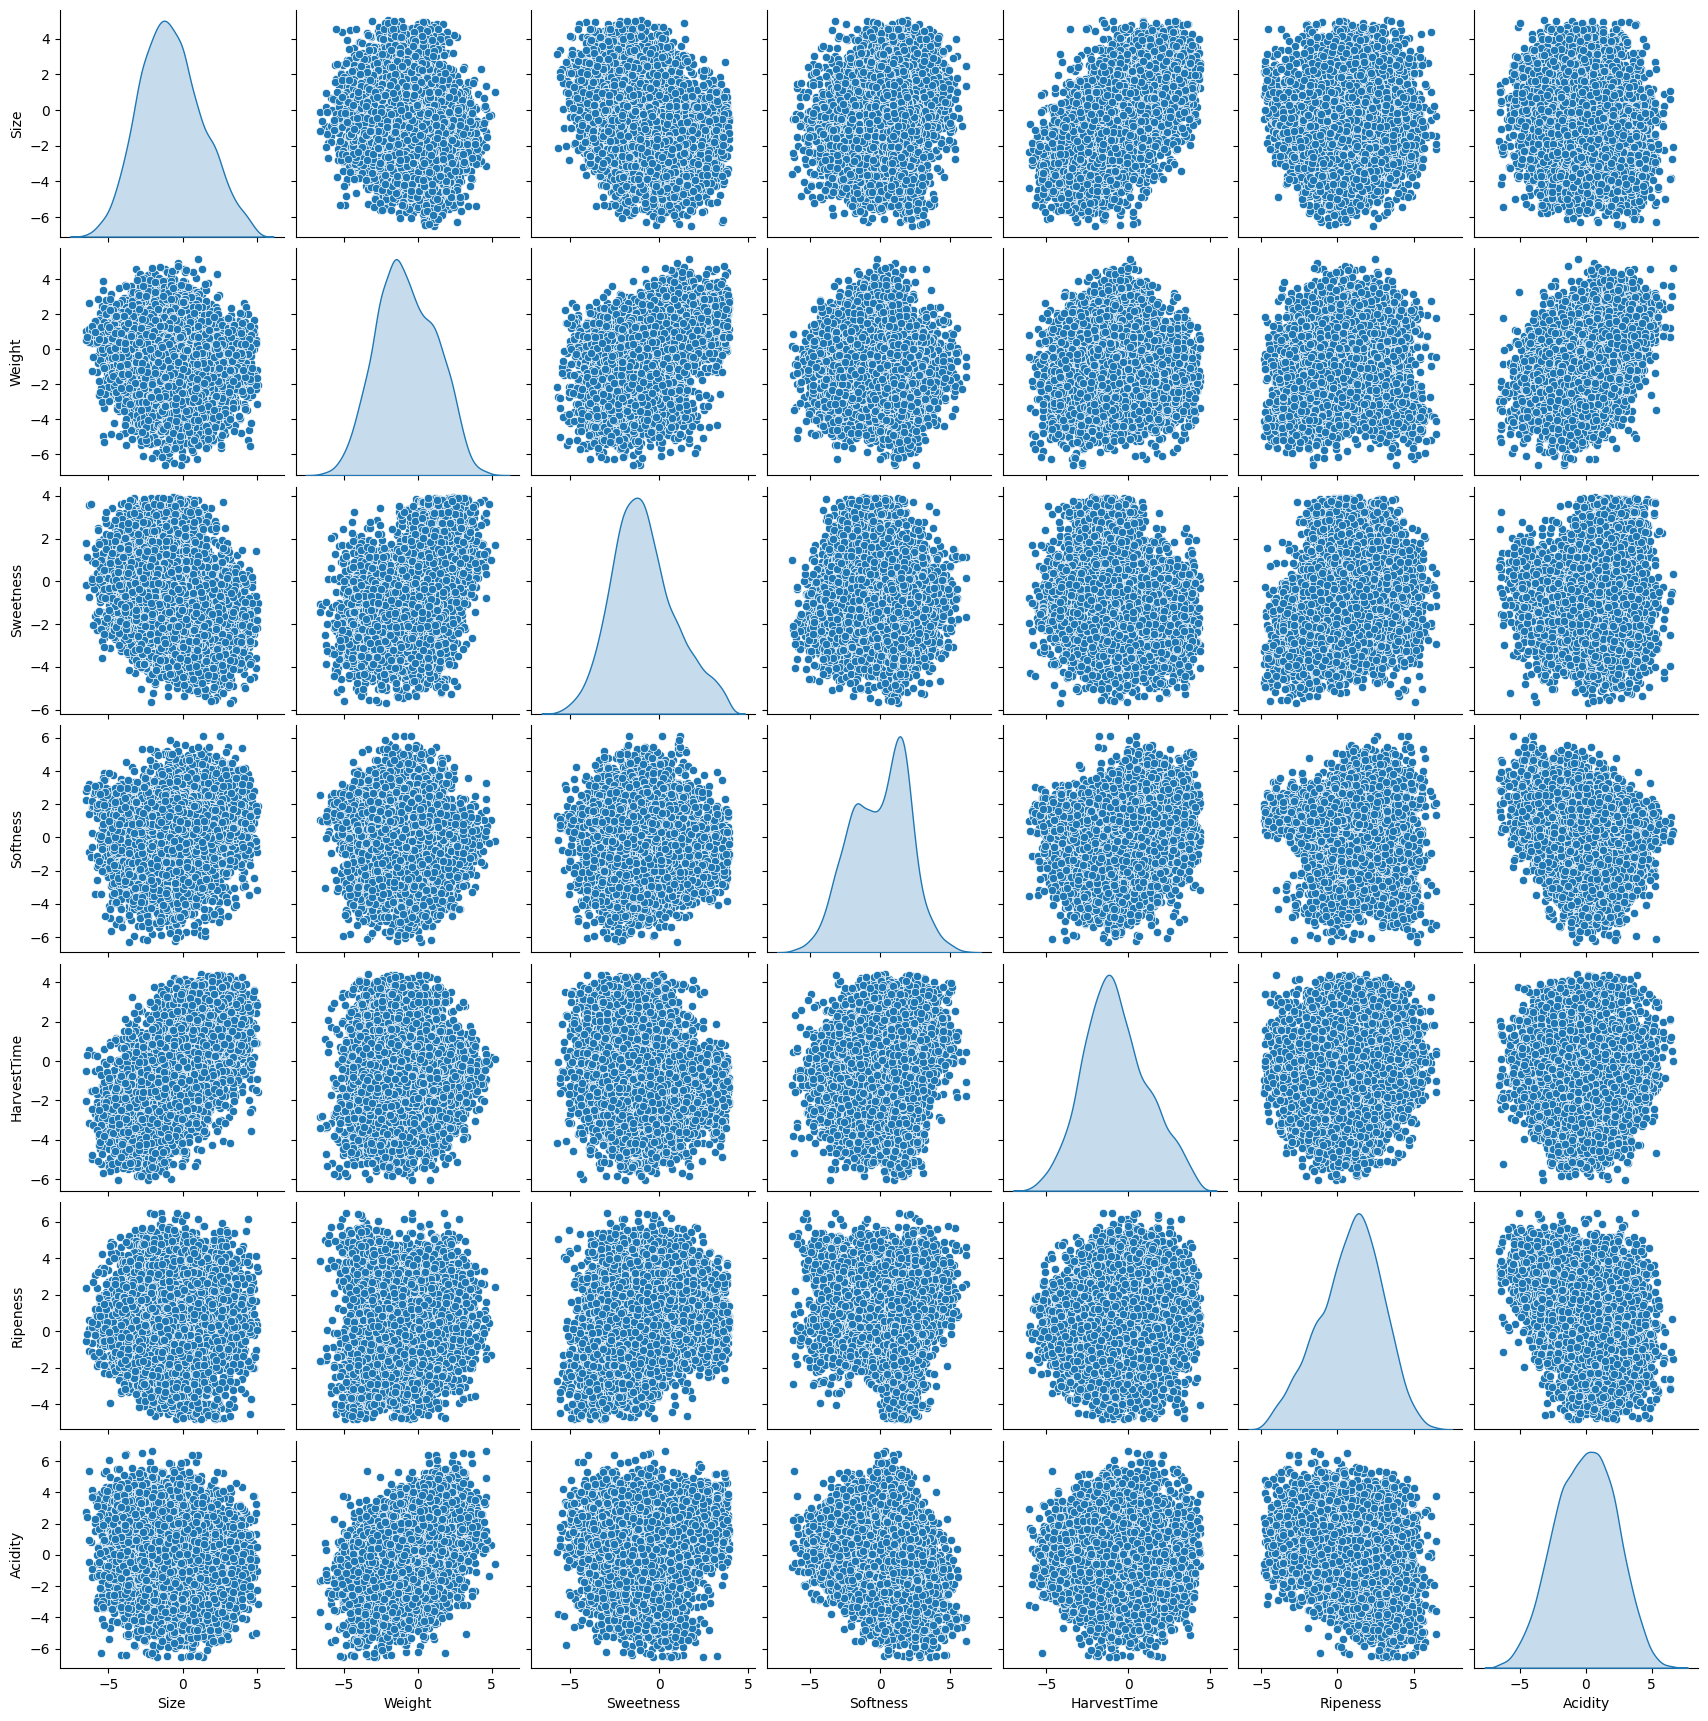

In [17]:
sns.pairplot(df, diag_kind = 'kde')

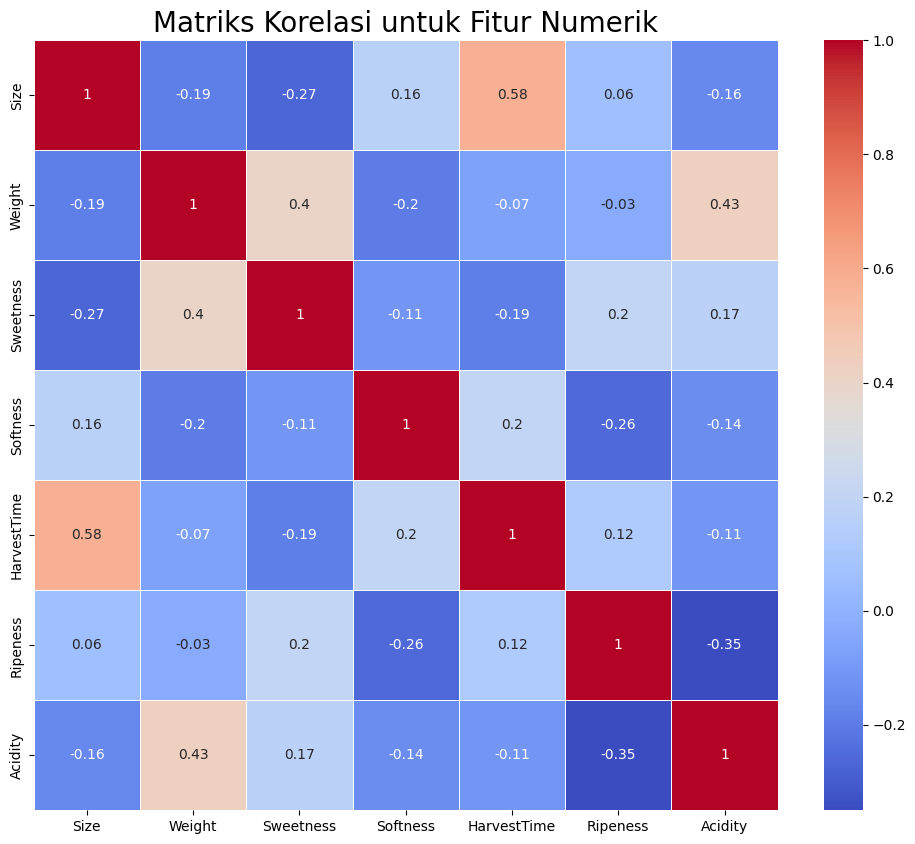

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih hanya kolom numerik untuk perhitungan korelasi
df_numeric = df.select_dtypes(include=[float, int])

# Membuat matriks korelasi
correlation_matrix = df_numeric.corr().round(2)

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik", size=20)
plt.show()


## 3. Data Preparation

Merupakan tahapan untuk mempersiapkan data sebelum dilakukannya pemodelan machine learning

### Data Clening

In [19]:
df['label'] = df['label'].map({'Good': 1, 'Bad': 0})

In [20]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,label
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


Merubah nilai Label dari `Good` dan `Bad` menjadi `1 untuk Good` dan `0 untuk Bad`

### Train Test dan Split

data dipisahkan antara fitur dengan label.
<br>
selanjutnya dataset dibagi menjadi `80:20` 

In [21]:
# Pisahkan fitur dan label
X = df.drop('label', axis=1)  # Menghapus kolom label dari dataset
y = df['label']

X.shape,y.shape

((7645, 7), (7645,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f'Total datasets: {len(X)}')
print(f'Total data Latih: {len(X_train)}')
print(f'Total data Uji: {len(X_test)}')

Total datasets: 7645
Total data Latih: 6116
Total data Uji: 1529


### Normalisasi

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

# 4. Pemodelan

Pada tahap pemodelan, menggunakan 5 model machine learning. yaitu sebagai berikut : 
<br>
1. Random Forest
2. Gradient Boosting
3. SVM
4. KNN
5. Logistic Regression

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Daftar model dengan parameter yang disesuaikan
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Menyimpan hasil akurasi untuk plotting
test_set_accuracies = []

# Membandingkan model-model dengan cross-validation
for name, model in models.items():
    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Fit model sekali pada seluruh X_train
    model.fit(X_train, y_train)
    
    # Prediksi pada set uji
    y_pred = model.predict(X_test)
    
    # Menghitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Menyimpan akurasi untuk plotting
    test_set_accuracies.append((name, accuracy))  # Simpan nama model dan akurasi

    # Menampilkan hasil
    print(f'{name}:')
    print(f'  Cross-Validation Accuracy: {scores.mean():.4f}')
    print(f'  Test Set Accuracy: {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1 Score: {f1:.4f}')
    print('  Confusion Matrix:')
    print(cm)
    print('--------------------------')

# Memastikan bahwa test_set_accuracies terisi
print("Hasil Akurasi Model:")
print(test_set_accuracies)


Random Forest:
  Cross-Validation Accuracy: 0.9629
  Test Set Accuracy: 0.9686
  Precision: 0.9687
  Recall: 0.9686
  F1 Score: 0.9686
  Confusion Matrix:
[[743  18]
 [ 30 738]]
--------------------------
Gradient Boosting:
  Cross-Validation Accuracy: 0.9547
  Test Set Accuracy: 0.9536
  Precision: 0.9537
  Recall: 0.9536
  F1 Score: 0.9536
  Confusion Matrix:
[[731  30]
 [ 41 727]]
--------------------------
Support Vector Machine:
  Cross-Validation Accuracy: 0.9791
  Test Set Accuracy: 0.9876
  Precision: 0.9876
  Recall: 0.9876
  F1 Score: 0.9876
  Confusion Matrix:
[[756   5]
 [ 14 754]]
--------------------------
K-Nearest Neighbors:
  Cross-Validation Accuracy: 0.9783
  Test Set Accuracy: 0.9804
  Precision: 0.9805
  Recall: 0.9804
  F1 Score: 0.9804
  Confusion Matrix:
[[751  10]
 [ 20 748]]
--------------------------
Logistic Regression:
  Cross-Validation Accuracy: 0.8738
  Test Set Accuracy: 0.8705
  Precision: 0.8705
  Recall: 0.8705
  F1 Score: 0.8705
  Confusion Matrix:


# 5. Evaluasi

didapatkan hasil akurasi terbaik pada SVM, selanjutnya pada KNN, dan Random Forest. 

Nama Model: ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression']
Akurasi Set Uji: [0.9686069326357096, 0.9535644211903205, 0.9875735775016351, 0.9803793328973185, 0.8705035971223022]


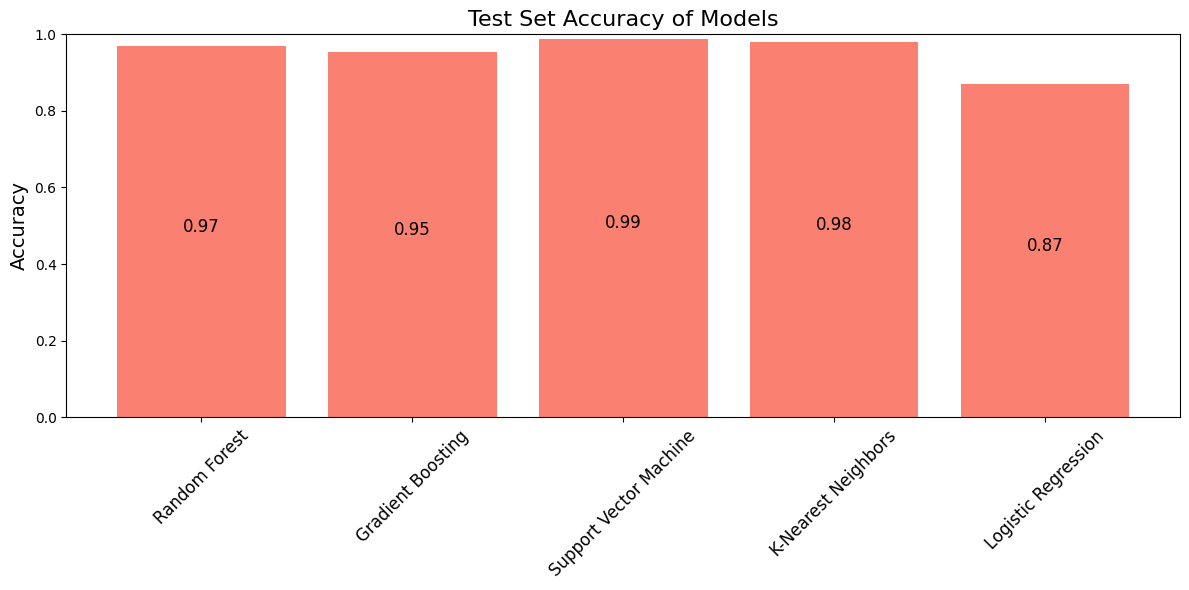

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil nama model dan akurasi dari hasil evaluasi
model_names = [name for name, _ in test_set_accuracies]
test_set_accuracies_values = [accuracy for _, accuracy in test_set_accuracies]

# Memastikan bahwa nama model dan akurasi terisi
print("Nama Model:", model_names)
print("Akurasi Set Uji:", test_set_accuracies_values)

# Membuat plot sederhana
plt.figure(figsize=(12, 6))  # Ukuran figure
x = np.arange(len(model_names))  # label untuk sumbu x

# Membuat batang untuk akurasi
bars = plt.bar(x, test_set_accuracies_values, color='salmon')

# Menambahkan label dan judul dengan ukuran font yang lebih besar
plt.ylabel('Accuracy', fontsize=14)
plt.title('Test Set Accuracy of Models', fontsize=16)
plt.xticks(x, model_names, rotation=45, fontsize=12)
plt.ylim(0, 1)  # Mengatur batas sumbu Y

# Menambahkan label akurasi di dalam setiap batang
for i in range(len(model_names)):
    plt.text(i, test_set_accuracies_values[i] / 2, f'{test_set_accuracies_values[i]:.2f}', 
             ha='center', color='black', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()
